In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
sector = "healthcare"

In [74]:
df_analysis = pd.read_csv(sector + "_dataset.csv")
df_analysis

Date  Tick       Close  Polarity  News
0      2016-01-04  AAAP   30.670000  0.000000     0
1      2016-01-05  AAAP   30.880000  0.000000     0
2      2016-01-06  AAAP   29.960000  0.000000     0
3      2016-01-07  AAAP   29.650000  0.000000     0
4      2016-01-08  AAAP   28.000000  0.000000     0
5      2016-01-09  AAAP   27.596667  0.000000     0
6      2016-01-10  AAAP   27.193333  0.000000     0
7      2016-01-11  AAAP   26.790000  0.000000     0
8      2016-01-12  AAAP   24.710000  0.000000     0
9      2016-01-13  AAAP   26.090000  0.000000     0
10     2016-01-14  AAAP   25.240000  0.000000     0
11     2016-01-15  AAAP   24.700000  0.000000     0
12     2016-01-16  AAAP   25.025000  0.000000     0
13     2016-01-17  AAAP   25.350000  0.000000     0
14     2016-01-18  AAAP   25.675000  0.000000     0
15     2016-01-19  AAAP   26.000000  0.000000     0
16     2016-01-20  AAAP   26.780000  0.000000     0
17     2016-01-21  AAAP   26.800000  0.000000     0
18     2016-01-22  AAAP   27.890000  0.000000     0
19     2016-01-23  AAAP   26.860000  0.000000     0
20     2016-01-24  AAAP   25.830000  0.000000     0
21     2016-01-25  AAAP   24.800000  0.000000     0
22     2016-01-26  AAAP   24.860000  0.000000     0
23     2016-01-27  AAAP   24.750000  0.000000     0
24     2016-01-28  AAAP   23.810000  0.000000     0
25     2016-01-29  AAAP   24.880000  0.000000     0
26     2016-01-30  AAAP   25.020000  0.000000     0
27     2016-01-31  AAAP   25.160000  0.000000     0
28     2016-02-01  AAAP   25.300000  0.000000     0
29     2016-02-02  AAAP   24.880000  0.000000     0
...           ...   ...         ...       ...   ...
97914  2017-09-01  ALXN  144.080000 -0.999999     1
97915  2017-09-02  ALXN  144.240000  0.000000     0
97916  2017-09-03  ALXN  144.400000  0.000000     0
97917  2017-09-04  ALXN  144.560000  0.000000     0
97918  2017-09-05  ALXN  144.720000 -1.999998     1
97919  2017-09-06  ALXN  145.120000 -0.499999     1
97920  2017-09-07  ALXN  143.500000  0.000000     1
97921  2017-09-08  ALXN  141.190000  0.999999     1
97922  2017-09-09  ALXN  141.770000  0.000000     0
97923  2017-09-10  ALXN  142.350000  0.000000     0
97924  2017-09-11  ALXN  142.930000  0.333333     1
97925  2017-09-12  ALXN  144.070000 -4.999996     1
97926  2017-09-13  ALXN  146.460000 -1.000000     1
97927  2017-09-14  ALXN  144.610000  3.399997     1
97928  2017-09-15  ALXN  146.690000  0.999999     1
97929  2017-09-16  ALXN  145.673333  0.000000     0
97930  2017-09-17  ALXN  144.656667  0.000000     0
97931  2017-09-18  ALXN  143.640000  2.999997     1
97932  2017-09-19  ALXN  142.830000 -1.999998     1
97933  2017-09-20  ALXN  142.920000 -1.999997     1
97934  2017-09-21  ALXN  142.920000  2.333332     1
97935  2017-09-22  ALXN  142.820000 -0.199999     1
97936  2017-09-23  ALXN  143.200000  0.000000     0
97937  2017-09-24  ALXN  143.580000  0.000000     0
97938  2017-09-25  ALXN  143.960000 -0.999999     1
97939  2017-09-26  ALXN  139.700000  2.333332     1
97940  2017-09-27  ALXN  139.450000  3.599997     1
97941  2017-09-28  ALXN  138.340000  1.000000     1
97942  2017-09-29  ALXN  140.290000 -0.999999     1
97943  2017-09-30  ALXN  140.290000  0.000000     0

[97944 rows x 5 columns]

<h3> Pivoting and Generating Features & Labels </h3>

In [7]:
df_analysis['Signals'] = [[x, y] for x,y in zip(df_analysis['Close'], df_analysis['Polarity'])]
df_pivot = pd.pivot_table(df_analysis, values='Signals', index='Tick', columns='Date', aggfunc=lambda x: np.array(x))
df_pivot_stock = pd.pivot_table(df_analysis, values='Close', index='Tick', columns='Date', aggfunc=lambda x: np.array(x))
df_pivot_news = pd.pivot_table(df_analysis, values='Polarity', index='Tick', columns='Date', aggfunc=lambda x: np.array(x))
df_pivot.head(), df_pivot.tail()

(Date     2016-01-04     2016-01-05     2016-01-06  \
 Tick                                                
 AAAP   [30.67, 0.0]   [30.88, 0.0]   [29.96, 0.0]   
 ABBV   [57.61, 0.0]   [57.37, 0.0]   [57.38, 0.0]   
 ABC   [101.87, 0.0]  [103.36, 0.0]  [101.78, 0.0]   
 ABMD   [85.24, 0.0]    [85.0, 0.0]    [85.3, 0.0]   
 ACAD   [34.62, 0.0]   [34.46, 0.0]   [29.24, 0.0]   
 
 Date                   2016-01-07                    2016-01-08  \
 Tick                                                              
 AAAP                 [29.65, 0.0]                   [28.0, 0.0]   
 ABBV                 [57.21, 0.0]                  [55.65, 0.0]   
 ABC                  [98.53, 0.0]  [97.96, -0.9999990000010001]   
 ABMD                 [81.92, 0.0]                  [84.58, 0.0]   
 ACAD  [28.73, 0.9999990000010001]                  [28.04, 0.0]   
 
 Date            2016-01-09            2016-01-10                   2016-01-11  \
 Tick                                                       

<h3> Prepare input for Tensor Flow </h3>

In [10]:
window = 100
features = []
labels = []
perc_var = []
dates = []

i = 0
end_col = window + 1

while end_col + i < df_pivot.shape[1]:
    features.append(np.array([df_pivot_stock.iloc[:, i:end_col+i-1].values, df_pivot_news.iloc[:, i:end_col+i-1].values]))
    l = (df_pivot.iloc[:,end_col+i].map(lambda x: x[0]) - df_pivot.iloc[:,end_col+i-1].map(lambda x: x[0])).map(lambda x: 1 if x>0 else 0).values
    labels.append(l)
    
    perc_var.append( ((df_pivot.iloc[:,end_col+i].map(lambda x: x[0]) - df_pivot.iloc[:,end_col+i-1].map(lambda x: x[0])) / df_pivot.iloc[:,end_col+i-1].map(lambda x: x[0])).values )
    dates.append(df_pivot.columns[end_col+i])
    i = i + 1

features = np.array(features)
labels = np.array(labels)
perc_var = np.array(perc_var)
features.shape, labels.shape, features[0], labels[0:2], perc_var.shape, perc_var[0], dates[-100:]

((535, 2, 154, 100),
 (535, 154),
 array([[[  30.67      ,   30.88      ,   29.96      , ...,   35.76666667,
            35.8       ,   35.75      ],
         [  57.61      ,   57.37      ,   57.38      , ...,   58.49      ,
            58.5       ,   59.89      ],
         [ 101.87      ,  103.36      ,  101.78      , ...,   84.73      ,
            84.44      ,   84.9       ],
         ..., 
         [  58.86      ,   60.06      ,   59.19      , ...,   59.57333333,
            59.5       ,   59.71      ],
         [ 101.81      ,  103.93      ,  104.38      , ...,  109.18666667,
           109.3       ,  111.57      ],
         [  47.27      ,   48.01      ,   48.02      , ...,   46.76      ,
            46.67      ,   47.01      ]],
 
        [[   0.        ,    0.        ,    0.        , ...,    0.        ,
             0.        ,    0.        ],
         [   0.        ,    0.        ,    0.        , ...,    0.        ,
             0.        ,    0.        ],
         [   0.     

<h3> Split Train - Eval </h3>

In [11]:
train_features = features[:-100]
test_features = features[-100:]
train_labels = labels[:-100]
test_labels = labels[-100:]

train_features.shape, test_features.shape, train_labels.shape, test_labels.shape

((435, 2, 154, 100), (100, 2, 154, 100), (435, 154), (100, 154))

<h3> TRAIN CNN </h3>

In [12]:
exec(open("cnn_stocks.py").read())

In [13]:
# Create the Estimator
stocks_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn, model_dir="../tmp/stocks_convnet_model")

# Set up logging for predictions
tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=50)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '../tmp/stocks_convnet_model', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


INFO:tensorflow:Using config: {'_model_dir': '../tmp/stocks_convnet_model', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [288]:
# Train the model
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": train_features},
    y=train_labels,
    batch_size=100,
    num_epochs=None,
    shuffle=True)

stocks_classifier.train(
    input_fn=train_input_fn,
    steps=1000,
    hooks=[logging_hook])

Tensor("Reshape:0", shape=(100, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(100, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(100, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(100, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(100, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(100, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(100, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(100, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(100, 512), dtype=float32)
Tensor("dropout/dropout/mul:0", shape=(100, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(100, 154), dtype=float32)
INFO:tensorflow:logits.dtype=<dtype: 'float32'>.


INFO:tensorflow:logits.dtype=<dtype: 'float32'>.


INFO:tensorflow:multi_class_labels.dtype=<dtype: 'float32'>.


INFO:tensorflow:multi_class_labels.dtype=<dtype: 'float32'>.


INFO:tensorflow:losses.dtype=<dtype: 'float32'>.


INFO:tensorflow:losses.dtype=<dtype: 'float32'>.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Saving checkpoints for 1 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:Saving checkpoints for 1 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:probabilities = [[ 0.          0.00000002  0.00009055 ...,  0.00001285  0.          0.        ]
 [ 0.          0.          0.         ...,  0.00001356  0.          0.        ]
 [ 0.          0.          0.00000004 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.00001538  0.00000147 ...,  0.00002009  0.00000002  0.        ]
 [ 0.          0.00000018  0.00002639 ...,  0.00000033  0.          0.        ]
 [ 0.          0.00000001  0.00008542 ...,  0.          0.          0.        ]]


INFO:tensorflow:probabilities = [[ 0.          0.00000002  0.00009055 ...,  0.00001285  0.          0.        ]
 [ 0.          0.          0.         ...,  0.00001356  0.          0.        ]
 [ 0.          0.          0.00000004 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.00001538  0.00000147 ...,  0.00002009  0.00000002  0.        ]
 [ 0.          0.00000018  0.00002639 ...,  0.00000033  0.          0.        ]
 [ 0.          0.00000001  0.00008542 ...,  0.          0.          0.        ]]


INFO:tensorflow:loss = 3.15623, step = 1


INFO:tensorflow:loss = 3.15623, step = 1


INFO:tensorflow:probabilities = [[ 0.00619036  0.0064211   0.0070384  ...,  0.00739042  0.00631727
   0.00624298]
 [ 0.00636507  0.0059162   0.00665794 ...,  0.00724762  0.00625259
   0.00570283]
 [ 0.00642945  0.00599822  0.00661689 ...,  0.00744687  0.00681563
   0.00621619]
 ..., 
 [ 0.00643995  0.00607299  0.00631512 ...,  0.00707079  0.00579963
   0.00621527]
 [ 0.00662654  0.00643572  0.00640897 ...,  0.00711689  0.00627163
   0.00613384]
 [ 0.00649934  0.00668121  0.00669945 ...,  0.00708854  0.00611777
   0.00594208]] (325.768 sec)


INFO:tensorflow:probabilities = [[ 0.00619036  0.0064211   0.0070384  ...,  0.00739042  0.00631727
   0.00624298]
 [ 0.00636507  0.0059162   0.00665794 ...,  0.00724762  0.00625259
   0.00570283]
 [ 0.00642945  0.00599822  0.00661689 ...,  0.00744687  0.00681563
   0.00621619]
 ..., 
 [ 0.00643995  0.00607299  0.00631512 ...,  0.00707079  0.00579963
   0.00621527]
 [ 0.00662654  0.00643572  0.00640897 ...,  0.00711689  0.00627163
   0.00613384]
 [ 0.00649934  0.00668121  0.00669945 ...,  0.00708854  0.00611777
   0.00594208]] (325.768 sec)


INFO:tensorflow:Saving checkpoints for 95 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:Saving checkpoints for 95 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:global_step/sec: 0.155666


INFO:tensorflow:global_step/sec: 0.155666


INFO:tensorflow:probabilities = [[ 0.00635258  0.00586714  0.00701058 ...,  0.00707501  0.00644286
   0.00546767]
 [ 0.00678814  0.00684603  0.00661269 ...,  0.00674867  0.00712102
   0.00534723]
 [ 0.00654808  0.0073901   0.00715992 ...,  0.00718895  0.00601927
   0.00492611]
 ..., 
 [ 0.00679008  0.00658834  0.00628131 ...,  0.00699881  0.00633664
   0.00612479]
 [ 0.00654736  0.00668675  0.00661699 ...,  0.00798088  0.00605546
   0.00577393]
 [ 0.00626032  0.00647314  0.00629297 ...,  0.00719625  0.00640896
   0.0062394 ]] (316.638 sec)


INFO:tensorflow:probabilities = [[ 0.00635258  0.00586714  0.00701058 ...,  0.00707501  0.00644286
   0.00546767]
 [ 0.00678814  0.00684603  0.00661269 ...,  0.00674867  0.00712102
   0.00534723]
 [ 0.00654808  0.0073901   0.00715992 ...,  0.00718895  0.00601927
   0.00492611]
 ..., 
 [ 0.00679008  0.00658834  0.00628131 ...,  0.00699881  0.00633664
   0.00612479]
 [ 0.00654736  0.00668675  0.00661699 ...,  0.00798088  0.00605546
   0.00577393]
 [ 0.00626032  0.00647314  0.00629297 ...,  0.00719625  0.00640896
   0.0062394 ]] (316.638 sec)


INFO:tensorflow:loss = 0.692927, step = 101 (642.398 sec)


INFO:tensorflow:loss = 0.692927, step = 101 (642.398 sec)


INFO:tensorflow:probabilities = [[ 0.00635099  0.00569652  0.0062753  ...,  0.00720235  0.00672771
   0.00600529]
 [ 0.00647155  0.00667036  0.00654435 ...,  0.00712815  0.00612061
   0.00574226]
 [ 0.00659788  0.00606767  0.0068689  ...,  0.00674257  0.0062582
   0.00604593]
 ..., 
 [ 0.00679215  0.00653556  0.0064501  ...,  0.00684988  0.00652087
   0.0062103 ]
 [ 0.00603054  0.00638382  0.00714624 ...,  0.00686269  0.00646671
   0.00505277]
 [ 0.00575896  0.00604417  0.00686621 ...,  0.00665897  0.00668975
   0.00625815]] (313.123 sec)


INFO:tensorflow:probabilities = [[ 0.00635099  0.00569652  0.0062753  ...,  0.00720235  0.00672771
   0.00600529]
 [ 0.00647155  0.00667036  0.00654435 ...,  0.00712815  0.00612061
   0.00574226]
 [ 0.00659788  0.00606767  0.0068689  ...,  0.00674257  0.0062582
   0.00604593]
 ..., 
 [ 0.00679215  0.00653556  0.0064501  ...,  0.00684988  0.00652087
   0.0062103 ]
 [ 0.00603054  0.00638382  0.00714624 ...,  0.00686269  0.00646671
   0.00505277]
 [ 0.00575896  0.00604417  0.00686621 ...,  0.00665897  0.00668975
   0.00625815]] (313.123 sec)


INFO:tensorflow:Saving checkpoints for 191 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:Saving checkpoints for 191 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:global_step/sec: 0.158752


INFO:tensorflow:global_step/sec: 0.158752


INFO:tensorflow:probabilities = [[ 0.00655452  0.00630382  0.00645258 ...,  0.00663962  0.00657767
   0.00669153]
 [ 0.00698168  0.00665422  0.0060238  ...,  0.00641744  0.00589481
   0.00584211]
 [ 0.00685358  0.006874    0.00676113 ...,  0.00651087  0.00624808
   0.00616056]
 ..., 
 [ 0.0065516   0.00613251  0.00650882 ...,  0.0067641   0.00600994
   0.00624208]
 [ 0.00893214  0.00759475  0.00765178 ...,  0.0078483   0.00621284
   0.00477943]
 [ 0.00646902  0.00654627  0.00655952 ...,  0.00660445  0.00638037
   0.00632364]] (316.790 sec)


INFO:tensorflow:probabilities = [[ 0.00655452  0.00630382  0.00645258 ...,  0.00663962  0.00657767
   0.00669153]
 [ 0.00698168  0.00665422  0.0060238  ...,  0.00641744  0.00589481
   0.00584211]
 [ 0.00685358  0.006874    0.00676113 ...,  0.00651087  0.00624808
   0.00616056]
 ..., 
 [ 0.0065516   0.00613251  0.00650882 ...,  0.0067641   0.00600994
   0.00624208]
 [ 0.00893214  0.00759475  0.00765178 ...,  0.0078483   0.00621284
   0.00477943]
 [ 0.00646902  0.00654627  0.00655952 ...,  0.00660445  0.00638037
   0.00632364]] (316.790 sec)


INFO:tensorflow:loss = 0.693073, step = 201 (629.911 sec)


INFO:tensorflow:loss = 0.693073, step = 201 (629.911 sec)


INFO:tensorflow:probabilities = [[ 0.00643052  0.00631328  0.0065079  ...,  0.0067746   0.00639606
   0.00619326]
 [ 0.00654693  0.00644985  0.00626085 ...,  0.00685157  0.00609364
   0.00642773]
 [ 0.00698693  0.0063515   0.00655386 ...,  0.00781272  0.0065677
   0.00592966]
 ..., 
 [ 0.00689214  0.00600804  0.00635709 ...,  0.00720366  0.00586847
   0.00608874]
 [ 0.00613578  0.00639936  0.00697097 ...,  0.00739508  0.00633897
   0.00638715]
 [ 0.00592878  0.00631422  0.00663401 ...,  0.00625617  0.00611063
   0.00526513]] (335.607 sec)


INFO:tensorflow:probabilities = [[ 0.00643052  0.00631328  0.0065079  ...,  0.0067746   0.00639606
   0.00619326]
 [ 0.00654693  0.00644985  0.00626085 ...,  0.00685157  0.00609364
   0.00642773]
 [ 0.00698693  0.0063515   0.00655386 ...,  0.00781272  0.0065677
   0.00592966]
 ..., 
 [ 0.00689214  0.00600804  0.00635709 ...,  0.00720366  0.00586847
   0.00608874]
 [ 0.00613578  0.00639936  0.00697097 ...,  0.00739508  0.00633897
   0.00638715]
 [ 0.00592878  0.00631422  0.00663401 ...,  0.00625617  0.00611063
   0.00526513]] (335.607 sec)


INFO:tensorflow:Saving checkpoints for 282 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:Saving checkpoints for 282 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:global_step/sec: 0.15054


INFO:tensorflow:global_step/sec: 0.15054


INFO:tensorflow:probabilities = [[ 0.00667871  0.00653457  0.00699209 ...,  0.00679558  0.00599868
   0.00609842]
 [ 0.00669931  0.0065464   0.00635214 ...,  0.00666795  0.0064086
   0.00647961]
 [ 0.00628945  0.00687036  0.00729683 ...,  0.00715089  0.00609941
   0.00538113]
 ..., 
 [ 0.00666269  0.0058115   0.00647347 ...,  0.00693634  0.00616694
   0.00643627]
 [ 0.00663396  0.00581462  0.00731201 ...,  0.0080266   0.00535993
   0.00558334]
 [ 0.00602949  0.00654994  0.00645637 ...,  0.00711984  0.00624402
   0.00601743]] (328.674 sec)


INFO:tensorflow:probabilities = [[ 0.00667871  0.00653457  0.00699209 ...,  0.00679558  0.00599868
   0.00609842]
 [ 0.00669931  0.0065464   0.00635214 ...,  0.00666795  0.0064086
   0.00647961]
 [ 0.00628945  0.00687036  0.00729683 ...,  0.00715089  0.00609941
   0.00538113]
 ..., 
 [ 0.00666269  0.0058115   0.00647347 ...,  0.00693634  0.00616694
   0.00643627]
 [ 0.00663396  0.00581462  0.00731201 ...,  0.0080266   0.00535993
   0.00558334]
 [ 0.00602949  0.00654994  0.00645637 ...,  0.00711984  0.00624402
   0.00601743]] (328.674 sec)


INFO:tensorflow:loss = 0.693072, step = 301 (664.281 sec)


INFO:tensorflow:loss = 0.693072, step = 301 (664.281 sec)


INFO:tensorflow:probabilities = [[ 0.00686992  0.0062121   0.00644916 ...,  0.00697585  0.00635169
   0.00622735]
 [ 0.006424    0.00532382  0.00754354 ...,  0.00719507  0.00575297
   0.00581897]
 [ 0.00651967  0.00665784  0.0067441  ...,  0.00691913  0.00652631
   0.00630226]
 ..., 
 [ 0.00595707  0.00674314  0.0077466  ...,  0.00875146  0.0056474
   0.0056031 ]
 [ 0.00729338  0.00632113  0.00712284 ...,  0.00784961  0.00528748
   0.00517152]
 [ 0.00671868  0.00630429  0.006266   ...,  0.00713315  0.00611687
   0.00656194]] (339.005 sec)


INFO:tensorflow:probabilities = [[ 0.00686992  0.0062121   0.00644916 ...,  0.00697585  0.00635169
   0.00622735]
 [ 0.006424    0.00532382  0.00754354 ...,  0.00719507  0.00575297
   0.00581897]
 [ 0.00651967  0.00665784  0.0067441  ...,  0.00691913  0.00652631
   0.00630226]
 ..., 
 [ 0.00595707  0.00674314  0.0077466  ...,  0.00875146  0.0056474
   0.0056031 ]
 [ 0.00729338  0.00632113  0.00712284 ...,  0.00784961  0.00528748
   0.00517152]
 [ 0.00671868  0.00630429  0.006266   ...,  0.00713315  0.00611687
   0.00656194]] (339.005 sec)


INFO:tensorflow:Saving checkpoints for 373 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:Saving checkpoints for 373 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:global_step/sec: 0.150457


INFO:tensorflow:global_step/sec: 0.150457


INFO:tensorflow:probabilities = [[ 0.00656579  0.00672242  0.00670099 ...,  0.00665271  0.00640103
   0.00629623]
 [ 0.00678628  0.00615193  0.00710019 ...,  0.00733005  0.00622926
   0.00590901]
 [ 0.00677695  0.0063585   0.00699598 ...,  0.00745512  0.00612915
   0.00570511]
 ..., 
 [ 0.00688864  0.00660511  0.00722579 ...,  0.0071119   0.00593829
   0.00614849]
 [ 0.0078817   0.00724354  0.00748598 ...,  0.00745782  0.00525473
   0.00542113]
 [ 0.00665266  0.00649783  0.0082178  ...,  0.0078927   0.00534389
   0.00722446]] (325.642 sec)


INFO:tensorflow:probabilities = [[ 0.00656579  0.00672242  0.00670099 ...,  0.00665271  0.00640103
   0.00629623]
 [ 0.00678628  0.00615193  0.00710019 ...,  0.00733005  0.00622926
   0.00590901]
 [ 0.00677695  0.0063585   0.00699598 ...,  0.00745512  0.00612915
   0.00570511]
 ..., 
 [ 0.00688864  0.00660511  0.00722579 ...,  0.0071119   0.00593829
   0.00614849]
 [ 0.0078817   0.00724354  0.00748598 ...,  0.00745782  0.00525473
   0.00542113]
 [ 0.00665266  0.00649783  0.0082178  ...,  0.0078927   0.00534389
   0.00722446]] (325.642 sec)


INFO:tensorflow:loss = 0.692582, step = 401 (664.650 sec)


INFO:tensorflow:loss = 0.692582, step = 401 (664.650 sec)


INFO:tensorflow:probabilities = [[ 0.006789    0.00658379  0.00664634 ...,  0.00664328  0.00606657
   0.00654249]
 [ 0.00655351  0.00637235  0.00666838 ...,  0.00691562  0.00608392
   0.00615793]
 [ 0.00667981  0.00620763  0.00662578 ...,  0.0073876   0.00607608
   0.00615957]
 ..., 
 [ 0.00652394  0.006506    0.00647301 ...,  0.00656712  0.00619884
   0.00627275]
 [ 0.00635091  0.00643344  0.00656141 ...,  0.0067361   0.00631858
   0.00629928]
 [ 0.00660305  0.00623427  0.00827186 ...,  0.00758251  0.00563034
   0.00537424]] (325.443 sec)


INFO:tensorflow:probabilities = [[ 0.006789    0.00658379  0.00664634 ...,  0.00664328  0.00606657
   0.00654249]
 [ 0.00655351  0.00637235  0.00666838 ...,  0.00691562  0.00608392
   0.00615793]
 [ 0.00667981  0.00620763  0.00662578 ...,  0.0073876   0.00607608
   0.00615957]
 ..., 
 [ 0.00652394  0.006506    0.00647301 ...,  0.00656712  0.00619884
   0.00627275]
 [ 0.00635091  0.00643344  0.00656141 ...,  0.0067361   0.00631858
   0.00629928]
 [ 0.00660305  0.00623427  0.00827186 ...,  0.00758251  0.00563034
   0.00537424]] (325.443 sec)


INFO:tensorflow:Saving checkpoints for 465 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:Saving checkpoints for 465 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:global_step/sec: 0.151223


INFO:tensorflow:global_step/sec: 0.151223


INFO:tensorflow:probabilities = [[ 0.00624498  0.00631658  0.00743555 ...,  0.00667648  0.0062889
   0.00607661]
 [ 0.00648205  0.00619337  0.00734849 ...,  0.007197    0.00543132
   0.0056494 ]
 [ 0.00683977  0.00616389  0.00667993 ...,  0.00711625  0.00603386
   0.00624898]
 ..., 
 [ 0.00627378  0.00606386  0.00644624 ...,  0.00726642  0.00628298
   0.00647356]
 [ 0.00706873  0.00608088  0.00691149 ...,  0.00723039  0.00658174
   0.00595252]
 [ 0.00607431  0.00659434  0.00758101 ...,  0.00741105  0.00580334
   0.00600552]] (335.832 sec)


INFO:tensorflow:probabilities = [[ 0.00624498  0.00631658  0.00743555 ...,  0.00667648  0.0062889
   0.00607661]
 [ 0.00648205  0.00619337  0.00734849 ...,  0.007197    0.00543132
   0.0056494 ]
 [ 0.00683977  0.00616389  0.00667993 ...,  0.00711625  0.00603386
   0.00624898]
 ..., 
 [ 0.00627378  0.00606386  0.00644624 ...,  0.00726642  0.00628298
   0.00647356]
 [ 0.00706873  0.00608088  0.00691149 ...,  0.00723039  0.00658174
   0.00595252]
 [ 0.00607431  0.00659434  0.00758101 ...,  0.00741105  0.00580334
   0.00600552]] (335.832 sec)


INFO:tensorflow:loss = 0.692098, step = 501 (661.272 sec)


INFO:tensorflow:loss = 0.692098, step = 501 (661.272 sec)


INFO:tensorflow:probabilities = [[ 0.00652525  0.00604839  0.00651202 ...,  0.00689674  0.00653525
   0.00626466]
 [ 0.00666705  0.00645625  0.00640582 ...,  0.00713776  0.00608373
   0.00613133]
 [ 0.00632035  0.00623913  0.00643711 ...,  0.00710358  0.00635108
   0.00640649]
 ..., 
 [ 0.00675418  0.00630082  0.00656988 ...,  0.00611454  0.00668403
   0.00577964]
 [ 0.00599867  0.00608458  0.00712638 ...,  0.00810193  0.00600226
   0.00491274]
 [ 0.0063314   0.00686062  0.00751196 ...,  0.00739117  0.0059747
   0.00556981]] (326.455 sec)


INFO:tensorflow:probabilities = [[ 0.00652525  0.00604839  0.00651202 ...,  0.00689674  0.00653525
   0.00626466]
 [ 0.00666705  0.00645625  0.00640582 ...,  0.00713776  0.00608373
   0.00613133]
 [ 0.00632035  0.00623913  0.00643711 ...,  0.00710358  0.00635108
   0.00640649]
 ..., 
 [ 0.00675418  0.00630082  0.00656988 ...,  0.00611454  0.00668403
   0.00577964]
 [ 0.00599867  0.00608458  0.00712638 ...,  0.00810193  0.00600226
   0.00491274]
 [ 0.0063314   0.00686062  0.00751196 ...,  0.00739117  0.0059747
   0.00556981]] (326.455 sec)


INFO:tensorflow:Saving checkpoints for 556 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:Saving checkpoints for 556 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:global_step/sec: 0.149701


INFO:tensorflow:global_step/sec: 0.149701


INFO:tensorflow:probabilities = [[ 0.00684451  0.00627409  0.00628922 ...,  0.0071136   0.0063914
   0.00618797]
 [ 0.0083362   0.00875307  0.00787636 ...,  0.0093795   0.00488764
   0.00471598]
 [ 0.00655199  0.0066232   0.00697692 ...,  0.00728169  0.00604306
   0.00605184]
 ..., 
 [ 0.00642051  0.00606257  0.00690282 ...,  0.00763076  0.00617531
   0.00635532]
 [ 0.0066558   0.00637809  0.0068707  ...,  0.0069389   0.00609139
   0.00643857]
 [ 0.00640478  0.00665441  0.00695474 ...,  0.00701118  0.00672464
   0.00585782]] (341.536 sec)


INFO:tensorflow:probabilities = [[ 0.00684451  0.00627409  0.00628922 ...,  0.0071136   0.0063914
   0.00618797]
 [ 0.0083362   0.00875307  0.00787636 ...,  0.0093795   0.00488764
   0.00471598]
 [ 0.00655199  0.0066232   0.00697692 ...,  0.00728169  0.00604306
   0.00605184]
 ..., 
 [ 0.00642051  0.00606257  0.00690282 ...,  0.00763076  0.00617531
   0.00635532]
 [ 0.0066558   0.00637809  0.0068707  ...,  0.0069389   0.00609139
   0.00643857]
 [ 0.00640478  0.00665441  0.00695474 ...,  0.00701118  0.00672464
   0.00585782]] (341.536 sec)


INFO:tensorflow:loss = 0.692712, step = 601 (667.991 sec)


INFO:tensorflow:loss = 0.692712, step = 601 (667.991 sec)


INFO:tensorflow:Saving checkpoints for 644 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:Saving checkpoints for 644 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:probabilities = [[ 0.00673384  0.00618204  0.00726768 ...,  0.00748803  0.00584475
   0.00550468]
 [ 0.00614627  0.00623505  0.00807558 ...,  0.0080739   0.00610109
   0.00653096]
 [ 0.00626168  0.00645399  0.00686767 ...,  0.00708186  0.00623857
   0.00593405]
 ..., 
 [ 0.00914065  0.00736313  0.00637839 ...,  0.00830426  0.00434423
   0.00497682]
 [ 0.0066653   0.00673058  0.00693183 ...,  0.00735173  0.00641726
   0.00563966]
 [ 0.00658759  0.00641011  0.00649997 ...,  0.00688778  0.00640511
   0.00616831]] (350.914 sec)


INFO:tensorflow:probabilities = [[ 0.00673384  0.00618204  0.00726768 ...,  0.00748803  0.00584475
   0.00550468]
 [ 0.00614627  0.00623505  0.00807558 ...,  0.0080739   0.00610109
   0.00653096]
 [ 0.00626168  0.00645399  0.00686767 ...,  0.00708186  0.00623857
   0.00593405]
 ..., 
 [ 0.00914065  0.00736313  0.00637839 ...,  0.00830426  0.00434423
   0.00497682]
 [ 0.0066653   0.00673058  0.00693183 ...,  0.00735173  0.00641726
   0.00563966]
 [ 0.00658759  0.00641011  0.00649997 ...,  0.00688778  0.00640511
   0.00616831]] (350.914 sec)


INFO:tensorflow:global_step/sec: 0.142742


INFO:tensorflow:global_step/sec: 0.142742


INFO:tensorflow:probabilities = [[ 0.00701509  0.00638341  0.00687813 ...,  0.00684875  0.00633418
   0.00582046]
 [ 0.00649274  0.00604869  0.00644174 ...,  0.00662005  0.00641661
   0.00642853]
 [ 0.00692786  0.00644383  0.00654218 ...,  0.00704014  0.00599672
   0.00628244]
 ..., 
 [ 0.00662052  0.0062585   0.0063494  ...,  0.00700651  0.00625025
   0.0064755 ]
 [ 0.00631711  0.00627884  0.00734582 ...,  0.00697387  0.00623046
   0.0059039 ]
 [ 0.00686609  0.00736901  0.00709787 ...,  0.00811483  0.00599451
   0.00553104]] (349.650 sec)


INFO:tensorflow:probabilities = [[ 0.00701509  0.00638341  0.00687813 ...,  0.00684875  0.00633418
   0.00582046]
 [ 0.00649274  0.00604869  0.00644174 ...,  0.00662005  0.00641661
   0.00642853]
 [ 0.00692786  0.00644383  0.00654218 ...,  0.00704014  0.00599672
   0.00628244]
 ..., 
 [ 0.00662052  0.0062585   0.0063494  ...,  0.00700651  0.00625025
   0.0064755 ]
 [ 0.00631711  0.00627884  0.00734582 ...,  0.00697387  0.00623046
   0.0059039 ]
 [ 0.00686609  0.00736901  0.00709787 ...,  0.00811483  0.00599451
   0.00553104]] (349.650 sec)


INFO:tensorflow:loss = 0.692214, step = 701 (700.565 sec)


INFO:tensorflow:loss = 0.692214, step = 701 (700.565 sec)


INFO:tensorflow:Saving checkpoints for 728 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:Saving checkpoints for 728 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:probabilities = [[ 0.00509343  0.0061427   0.00692151 ...,  0.00722312  0.00641673
   0.00576012]
 [ 0.00667538  0.00596287  0.00716622 ...,  0.00713443  0.0059396
   0.00609862]
 [ 0.00673106  0.00609466  0.00586033 ...,  0.0075003   0.00628896
   0.00600941]
 ..., 
 [ 0.00696082  0.00595907  0.00595027 ...,  0.00695966  0.00586417
   0.00611286]
 [ 0.00677928  0.00659424  0.00706754 ...,  0.00692843  0.00634694
   0.00627831]
 [ 0.00657018  0.00651543  0.00660972 ...,  0.00723399  0.00582273
   0.00627505]] (362.459 sec)


INFO:tensorflow:probabilities = [[ 0.00509343  0.0061427   0.00692151 ...,  0.00722312  0.00641673
   0.00576012]
 [ 0.00667538  0.00596287  0.00716622 ...,  0.00713443  0.0059396
   0.00609862]
 [ 0.00673106  0.00609466  0.00586033 ...,  0.0075003   0.00628896
   0.00600941]
 ..., 
 [ 0.00696082  0.00595907  0.00595027 ...,  0.00695966  0.00586417
   0.00611286]
 [ 0.00677928  0.00659424  0.00706754 ...,  0.00692843  0.00634694
   0.00627831]
 [ 0.00657018  0.00651543  0.00660972 ...,  0.00723399  0.00582273
   0.00627505]] (362.459 sec)


INFO:tensorflow:global_step/sec: 0.140377


INFO:tensorflow:global_step/sec: 0.140377


INFO:tensorflow:probabilities = [[ 0.00690067  0.00631104  0.00646071 ...,  0.00649864  0.00609408
   0.00628326]
 [ 0.00655461  0.00627911  0.00661311 ...,  0.0064663   0.00640271
   0.00617541]
 [ 0.00676508  0.00610798  0.00708949 ...,  0.0075458   0.00610309
   0.00566884]
 ..., 
 [ 0.00689458  0.00663227  0.00650672 ...,  0.00708578  0.00623926
   0.00639361]
 [ 0.00668608  0.00655918  0.00632819 ...,  0.006596    0.00616233
   0.00605807]
 [ 0.00618161  0.00663735  0.00781244 ...,  0.00845379  0.00586116
   0.00617214]] (349.927 sec)


INFO:tensorflow:probabilities = [[ 0.00690067  0.00631104  0.00646071 ...,  0.00649864  0.00609408
   0.00628326]
 [ 0.00655461  0.00627911  0.00661311 ...,  0.0064663   0.00640271
   0.00617541]
 [ 0.00676508  0.00610798  0.00708949 ...,  0.0075458   0.00610309
   0.00566884]
 ..., 
 [ 0.00689458  0.00663227  0.00650672 ...,  0.00708578  0.00623926
   0.00639361]
 [ 0.00668608  0.00655918  0.00632819 ...,  0.006596    0.00616233
   0.00605807]
 [ 0.00618161  0.00663735  0.00781244 ...,  0.00845379  0.00586116
   0.00617214]] (349.927 sec)


INFO:tensorflow:loss = 0.692494, step = 801 (712.387 sec)


INFO:tensorflow:loss = 0.692494, step = 801 (712.387 sec)


INFO:tensorflow:Saving checkpoints for 814 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:Saving checkpoints for 814 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:probabilities = [[ 0.00650097  0.00631003  0.00666318 ...,  0.00699752  0.00613083
   0.0064182 ]
 [ 0.00653989  0.00599499  0.00631046 ...,  0.00705379  0.0062348
   0.00615203]
 [ 0.00681201  0.00628717  0.00655131 ...,  0.00693455  0.00594484
   0.00636128]
 ..., 
 [ 0.00772393  0.00604051  0.00780416 ...,  0.0067726   0.00572671
   0.00674165]
 [ 0.00655696  0.0069006   0.00683985 ...,  0.00678243  0.00639545
   0.00631423]
 [ 0.00640663  0.00641294  0.00697389 ...,  0.00895087  0.00592389
   0.00616732]] (333.162 sec)


INFO:tensorflow:probabilities = [[ 0.00650097  0.00631003  0.00666318 ...,  0.00699752  0.00613083
   0.0064182 ]
 [ 0.00653989  0.00599499  0.00631046 ...,  0.00705379  0.0062348
   0.00615203]
 [ 0.00681201  0.00628717  0.00655131 ...,  0.00693455  0.00594484
   0.00636128]
 ..., 
 [ 0.00772393  0.00604051  0.00780416 ...,  0.0067726   0.00572671
   0.00674165]
 [ 0.00655696  0.0069006   0.00683985 ...,  0.00678243  0.00639545
   0.00631423]
 [ 0.00640663  0.00641294  0.00697389 ...,  0.00895087  0.00592389
   0.00616732]] (333.162 sec)


INFO:tensorflow:Saving checkpoints for 901 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:Saving checkpoints for 901 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:global_step/sec: 0.145364


INFO:tensorflow:global_step/sec: 0.145364


INFO:tensorflow:probabilities = [[ 0.00648498  0.00652014  0.00749054 ...,  0.00833641  0.00529595
   0.00565554]
 [ 0.00673879  0.00650124  0.0068228  ...,  0.00678223  0.00578659
   0.00616112]
 [ 0.00647037  0.00623619  0.0062559  ...,  0.00701309  0.00624729
   0.00640421]
 ..., 
 [ 0.00735294  0.00657785  0.00659352 ...,  0.00729855  0.00666238
   0.00576479]
 [ 0.00689974  0.00612004  0.00654709 ...,  0.00678999  0.00637133
   0.00626447]
 [ 0.00694511  0.00705618  0.00786144 ...,  0.00746212  0.00605827
   0.00562849]] (354.735 sec)


INFO:tensorflow:probabilities = [[ 0.00648498  0.00652014  0.00749054 ...,  0.00833641  0.00529595
   0.00565554]
 [ 0.00673879  0.00650124  0.0068228  ...,  0.00678223  0.00578659
   0.00616112]
 [ 0.00647037  0.00623619  0.0062559  ...,  0.00701309  0.00624729
   0.00640421]
 ..., 
 [ 0.00735294  0.00657785  0.00659352 ...,  0.00729855  0.00666238
   0.00576479]
 [ 0.00689974  0.00612004  0.00654709 ...,  0.00678999  0.00637133
   0.00626447]
 [ 0.00694511  0.00705618  0.00786144 ...,  0.00746212  0.00605827
   0.00562849]] (354.735 sec)


INFO:tensorflow:loss = 0.692827, step = 901 (687.910 sec)


INFO:tensorflow:loss = 0.692827, step = 901 (687.910 sec)


INFO:tensorflow:probabilities = [[ 0.00644796  0.00607403  0.00781614 ...,  0.00701056  0.00607337
   0.0052627 ]
 [ 0.00696709  0.00657576  0.00682432 ...,  0.00715631  0.00621336
   0.00561342]
 [ 0.00643131  0.00659077  0.00773379 ...,  0.00705928  0.00606613
   0.00575137]
 ..., 
 [ 0.00651623  0.00592976  0.00595343 ...,  0.00674322  0.00613285
   0.0062209 ]
 [ 0.00686248  0.00697873  0.00707306 ...,  0.00688785  0.00607815
   0.00583796]
 [ 0.006356    0.00613752  0.0062355  ...,  0.00719762  0.00602258
   0.00610671]] (341.015 sec)


INFO:tensorflow:probabilities = [[ 0.00644796  0.00607403  0.00781614 ...,  0.00701056  0.00607337
   0.0052627 ]
 [ 0.00696709  0.00657576  0.00682432 ...,  0.00715631  0.00621336
   0.00561342]
 [ 0.00643131  0.00659077  0.00773379 ...,  0.00705928  0.00606613
   0.00575137]
 ..., 
 [ 0.00651623  0.00592976  0.00595343 ...,  0.00674322  0.00613285
   0.0062209 ]
 [ 0.00686248  0.00697873  0.00707306 ...,  0.00688785  0.00607815
   0.00583796]
 [ 0.006356    0.00613752  0.0062355  ...,  0.00719762  0.00602258
   0.00610671]] (341.015 sec)


INFO:tensorflow:Saving checkpoints for 989 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:Saving checkpoints for 989 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:Saving checkpoints for 1000 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:Saving checkpoints for 1000 into ../tmp/stocks_convnet_model\model.ckpt.


INFO:tensorflow:Loss for final step: 0.692483.


INFO:tensorflow:Loss for final step: 0.692483.


<h3> Model Evaluation </h3>

In [16]:
import datetime as dt
first_saturday = dt.datetime.strptime("2017-06-24", "%Y-%m-%d")

holidays_2017 = ['2017-01-02',
                 '2017-01-16',
                 '2017-02-20',
                 '2017-04-14',
                 '2017-05-29',
                 '2017-07-04',
                 '2017-09-04',
                 '2017-11-23',
                 '2017-12-25']

eval_days = [x not in holidays_2017 and (dt.datetime.strptime(x, "%Y-%m-%d") - first_saturday).days % 7 > 1 
     for x in dates[-100:]]

In [36]:
perc_var_eval = perc_var[-100:]

new_perc_val = []

finished = False
i = 0
while i < len(perc_var_eval):
    print (eval_days[i])
    if eval_days[i]:
        new_perc_val.append(perc_var_eval[i])
        i = i + 1
    else:
        cumulative = 0
        while(not eval_days[i]):
            cumulative = perc_var_eval[i]
            new_perc_val.append(np.array([0 for k in perc_var_eval[i]]))
            i = i + 1
            if i >= len(eval_days):
                finished = True
                break;
        if not finished:
            new_perc_val.append(perc_var_eval[i] + cumulative)
            i = i + 1

perc_var_eval = new_perc_val

True
False
True
True
True
True
False
False
True
True
False
True
True
True
True
False
True
True
True
True
False
True
True
True
True
False
True
True
True
True
False
True
True
True
True
False
True
True
True
True
False
True
True
True
True
False
True
True
True
True
False
True
True
True
False
True
True
True
True
False
True
True
True
True
False
True
True
True
True
False


In [43]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": test_features},
    y=test_labels,
    num_epochs=1,
    shuffle=False)

earnings = []
for N in range(1, 155):
    eval_results = stocks_classifier.predict(input_fn=eval_input_fn)
    
    capital = 1
    for i, r in enumerate(eval_results):
        top_n = r['probabilities'].argsort()[-N:][::-1]
        allocation = [0 for x in perc_var_eval[i]]
        for j, t in enumerate(top_n):
            allocation[t] = capital / N

        variation = allocation + (allocation * perc_var_eval[i])
        capital = variation.sum()
    earnings.append(capital)

Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


Tensor("Reshape:0", shape=(?, 154, 100, 2), dtype=float32)
Tensor("conv2d/Relu:0", shape=(?, 154, 100, 32), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 154, 50, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 154, 50, 8), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 154, 10, 8), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 154, 10, 2), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 154, 5, 2), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 1540), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dropout/Identity:0", shape=(?, 512), dtype=float32)
Tensor("dense_2/BiasAdd:0", shape=(?, 154), dtype=float32)
INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


INFO:tensorflow:Restoring parameters from ../tmp/stocks_convnet_model\model.ckpt-1000


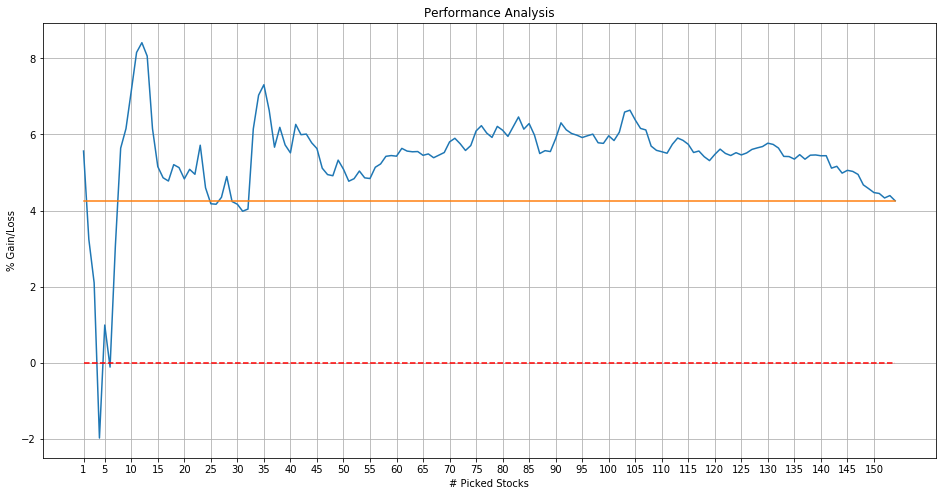

In [73]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=[16,8])
plt.plot([i for i in range(1,155)], [(e-1)*100 for e in earnings])
plt.plot([i for i in range(1,155)], [(earnings[-1]-1)*100 for j in range(154)])
plt.plot([i for i in range(1,155)], [0 for j in range(154)], 'r--')
plt.xticks([i for i in range(1, 155) if (i)%5 == 0 or i==1])

#plt.annotate(str((max(earnings)-1)*100 + "% with {} stocks".format(earnings.index(max(earnings))+1)), xy=(earnings.index(max(earnings))+1, (max(earnings)-1)*100)) 

plt.title("Performance Analysis")
plt.ylabel("% Gain/Loss")
plt.xlabel("# Picked Stocks")
plt.grid(True)
plt.savefig('performance.eps', format='eps')

In [78]:
max(earnings), min(earnings), earnings[-1], (max(earnings)-1)/(earnings[-1] - 1)

(1.0841048351642959,
 0.98025968162520138,
 1.0425683242799537,
 1.9757610050885315)

In [77]:
earnings.index(max(earnings)) + 1

12